In [1]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from qiskit_experiments.framework import *
from qiskit_experiments.library import *
from qiskit.test.mock import *
from qiskit.providers.aer import *

In [2]:
#initializing providers
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
quito_sim = quito_sim = AerSimulator.from_backend(FakeQuito())

In [19]:
def perform_qst(state): 
    qc = QuantumCircuit(QuantumRegister(1), ClassicalRegister(1))
    if state == '0':
        qc.append(Initialize([1, 0]), [0])
    elif state == '+':
        qc.append(Initialize([1, 0]), [0])
        qc.h(0)
    elif state == '-':
        qc.append(Initialize([0, 1]), [0])
        qc.h(0)
    elif state == '1':
        qc.append(Initialize([0, 1]), [0])
    qc.measure(0, 0)
    exp = StateTomography(qc)
    data = exp.run(simulator, seed_simulation = 1024).block_for_results()
    return data.analysis_results('state').value

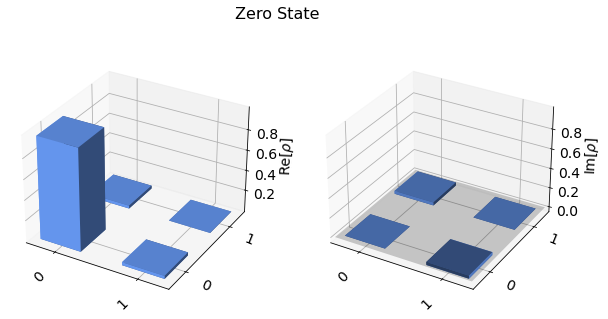

In [20]:
plot_state_city(perform_qst('0'), figsize = [10, 5], color = ['cornflowerblue', 'cornflowerblue'], title = 'Zero State')

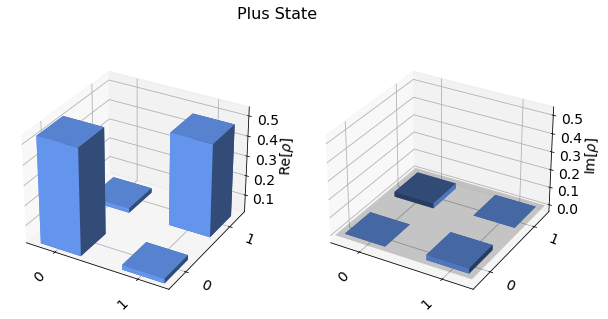

In [21]:
plot_state_city(perform_qst('+'), figsize = [10, 5], color = ['cornflowerblue', 'cornflowerblue'], title = 'Plus State')

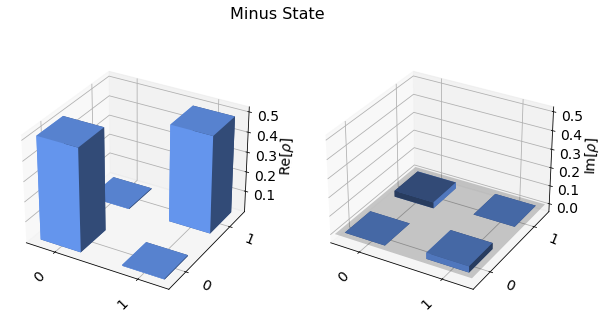

In [22]:
plot_state_city(perform_qst('-'), figsize = [10, 5], color = ['cornflowerblue', 'cornflowerblue'], title = 'Minus State')

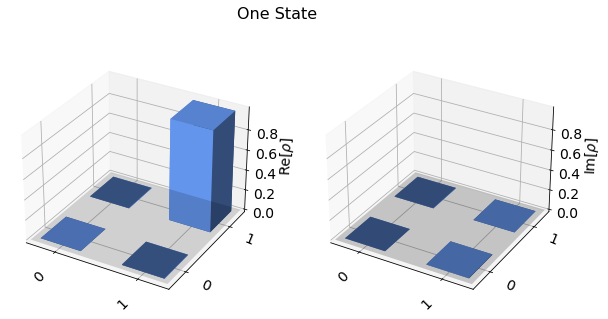

In [23]:
plot_state_city(perform_qst('1'), figsize = [10, 5], color = ['cornflowerblue', 'cornflowerblue'], title = 'One State')